# Linear Regression

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

/Users/andreafabry/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
# Get loans data
loans = pd.read_csv('loansData.csv')
loans.head(20)

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.00,36.0
1,12.12,715-719,19200.0,19200.00,36.0
2,21.98,690-694,35000.0,35000.00,60.0
3,9.99,695-699,10000.0,9975.00,36.0
4,11.71,695-699,12000.0,12000.00,36.0
5,15.31,670-674,6000.0,6000.00,36.0
6,7.90,720-724,10000.0,10000.00,36.0
7,17.14,705-709,33500.0,33450.00,60.0
8,14.33,685-689,14675.0,14675.00,36.0
9,6.91,715-719,7000.0,7000.00,36.0


## Cleaning

In [19]:
# any missing values?
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 7 columns):
interest_rate                 2498 non-null float64
fico_range                    2498 non-null object
amount_requested              2498 non-null float64
amount_funded_by_investors    2498 non-null float64
loan_length                   2498 non-null int64
fico_low                      2498 non-null object
fico_high                     2498 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 136.7+ KB


In [8]:
# Clean data - convert categorical (loan length 36 and 60) to codes
# binary: convert them to numerical 0, 1
# 36 months - 0, 60 months - 1
loans['loan_length'] = loans['loan_length'].map({36.0: 0, 60.0: 1})
loans.head()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.0,0
1,12.12,715-719,19200.0,19200.0,0
2,21.98,690-694,35000.0,35000.0,1
3,9.99,695-699,10000.0,9975.0,0
4,11.71,695-699,12000.0,12000.0,0


In [22]:
# Convert fico_range into two columns, fico_low and fico_high
# make a copy of the fico_range colum for low values
loans['fico_low'] = loans['fico_range']
# make a copy of the fico_range colum for high values
loans['fico_high'] = loans['fico_range']
loans.head()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high
0,8.90,735-739,20000.0,20000.0,0,735-739,735-739
1,12.12,715-719,19200.0,19200.0,0,715-719,715-719
2,21.98,690-694,35000.0,35000.0,1,690-694,690-694
3,9.99,695-699,10000.0,9975.0,0,695-699,695-699
4,11.71,695-699,12000.0,12000.0,0,695-699,695-699


In [23]:
# strip last 4 digits of fico_low column
loans['fico_low'] = [int(t[0:-4]) for t in loans.fico_range]
# strip first 4 digits of fico_high column
loans['fico_high'] = [int(t[4:]) for t in loans.fico_range]
loans.head()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high
0,8.90,735-739,20000.0,20000.0,0,735,739
1,12.12,715-719,19200.0,19200.0,0,715,719
2,21.98,690-694,35000.0,35000.0,1,690,694
3,9.99,695-699,10000.0,9975.0,0,695,699
4,11.71,695-699,12000.0,12000.0,0,695,699


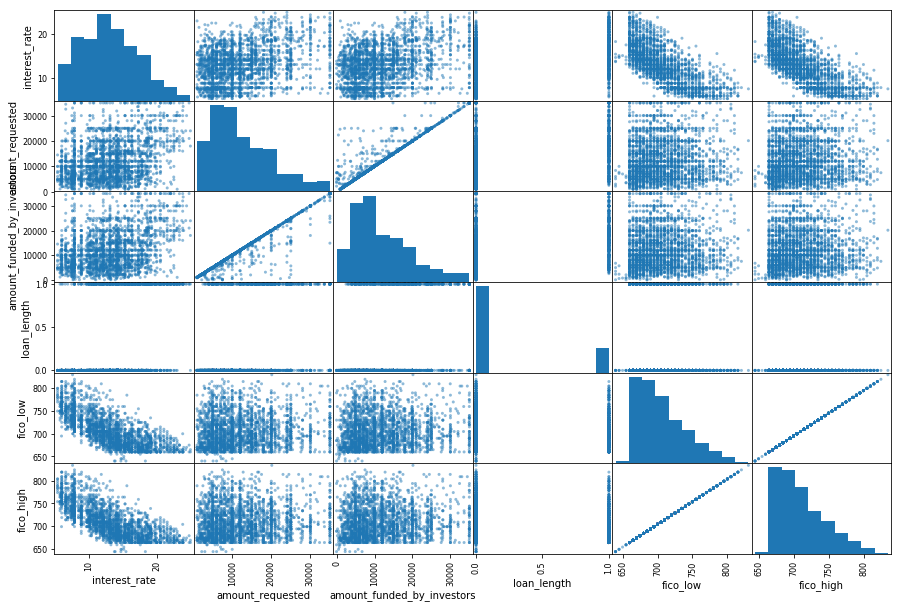

In [25]:
# plot all combinations
pd.plotting.scatter_matrix(loans, figsize=(15, 10))
plt.show()

## Ordinary Least Regression

In [26]:
# Linear Regression Equation explained
# Y: Y variable, dependent variable, target, outcome, what I'm trying to predict
# Xs: X variables, independent variables, features, attributes, what I'm using to predict Y
# Capital Greek B[o]: intercept, baseline, where the predicted value of X=0
# Capital Greek B[1...n]: slope/regression coefficients, the degree by which each
# X variable goes up/down for 1 value of X holding everything else constant
# Greek e: error term/residuals, difference between predictions and true y values

# Do linear regression
# Choose the predictor(s) and add a constant term
# (allow for an intercept)
X = loans[['amount_requested', 'amount_funded_by_investors', 'loan_length', 'fico_low', 'fico_high']] 
# determine X variable
X = sm.add_constant(X)  # We need to manually add a constant, aka intercept, when working with statsmodels
y = loans['interest_rate'] # determine Y variable

# create a linear regression object
loans_model = sm.OLS(y, X)
loans_results = loans_model.fit()

## Metrics

In [27]:
# Metrics Explained Overall
# Root Mean Squared Error/RSS: sum of y[i] - y-hat[i] squared
# (difference between true value of y and predicted value of y)
#  by n, then take the square root

# Residual Standard Error: same as RMSE/RSS adjusted for degrees of freedom,
# aka instead of divided by n, divided n-p-1, then take square root

# R Squared: coefficient of determination, proportion of variance explained by
# model, independent of scale of Y sum of y[i] - y-hat[i] squared
# (distance between true y values and predicted y values),
# divided by sum of y[i] - y-topline[i] squared
# (how far each y value is away from the mean of y)
# RSS: residuals sums squared / TSS: total sum squared
loans_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          interest_rate   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1833.
Date:                Mon, 02 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:01:32   Log-Likelihood:                -5402.6
No. Observations:                2498   AIC:                         1.082e+04
Df Residuals:                    2493   BIC:                         1.084e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.0733      0.095     85.075      0.000       7.887       8.259
amount_requested            6.778e-05   2.23e-05      3.044      0.002    2.41e-05       0.000
amount_funded_by_investors  7.366e-05   2.23e-05      3.296      0.001    2.98e-05       0.000
loan_length                    3.2826      0.112     29.349      0.000       3.063       3.502
fico_low                     -16.1905      0.190    -85.036      0.000     -16.564     -15.817
fico_high                     16.1029      0.189     85.114      0.000      15.732      16.474
==============================================================================
Omnibus:                      154.030   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.119
Skew:                           0.491   Prob(JB):                     1.32e-54
Kurtosis:                       4.192   Cond. No.                     8.46e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
# Metrics Continued: Full Model vs. Submodel
# F-test compares model with some predictors (submodel/reduced model)
# to a full model
# default=drops all predictors and compares null model to full model
# (not very helpful)
# large F-statistic/low p-value means the dropped parameters are important

# T-test evaluates one variable (F-test for one variable)
# t-statistic: significance of each coefficients
# aka outside the range of what random chance may produce
# large t-statistics/low p-value means the X variable is more important

In [32]:
# let's drop amounts and see what we get
# Do linear regression
# Choose the predictor(s) and add a constant term
# (allow for an intercept)
X = loans[['loan_length', 'fico_low', 'fico_high']] 
# determine X variable
X = sm.add_constant(X)  # We need to manually add a constant, aka intercept, when working with statsmodels
y = loans['interest_rate'] # determine Y variable

# create a linear regression object
loans_model2 = sm.OLS(y, X)
loans_results2 = loans_model2.fit()
# next version: fico_low
# try with just amount_funded

## Inspecting Residuals

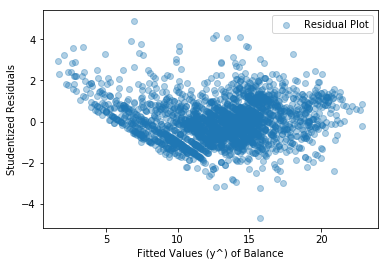

In [28]:
# Residuals plots
# Studentized residuals: errors standardized against real variance 
# (mean squared error times 1-diagonal elements of the y^ matrix)
# shows the number of standard deviations away we are from the regression line

# Detect: non-linear relationships, outliers, heteroscedasticity

# Plot studentized residuals
loans_results = sm.OLS(y, X).fit()
student_resids = loans_results.outlier_test()['student_resid']
y_hats = loans_results.predict(X)

plt.scatter(y_hats, student_resids, alpha = .35, label='Residual Plot')
plt.legend()
plt.xlabel('Fitted Values (y^) of Balance')
plt.ylabel('Studentized Residuals')
plt.show()

### Outliers and Leverage

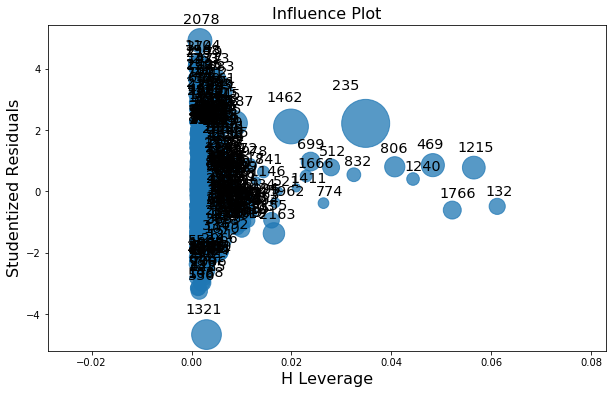

In [29]:
# outliers vs. high leverage points
# high leverage points influence the regression line
# outliers are not an issue in big data problems, except for anomaly detection
# outliers with high leverage are a problem
# fix: check if it is bad data? compare regression line w/ or w/o influential point

# Plot using Cook's distance to see outliers with high leverage
# combines standardized residuals, hat-value and cook's distance
# cook's distance combines leverage and residual size
# size of the bubble shows the value of cook's distance metrics
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(loans_results, ax=ax, criterion="cooks")

### Heteroscedasticity

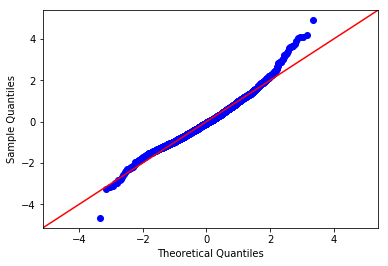

In [30]:
# for formal inference to be valid, residuals
# have to be normally distributed and have the same variance (if not, heteroscedasticity)
# be independent (if not, autocollinearity)
# heteroskedasticity: errors are greater for some portion of the range
# plot errors against normal distribution
# fix: transformation of Y 
sm.graphics.qqplot(student_resids, line='45', fit=True)
plt.show()

### Non-linear Relationships

In [ ]:
# non-linear relationships fix: many methods, inserting interaction features

## Interaction Features

In [ ]:
# interaction between two X variables
# aka correlated variables
# leads to multicollinearity - redundancy among predictors
# variables need to be removed until multicollinearity is gone
# otherwise, model is overfitted and accounts for randomness of true y values
# (noise), not just the underlying model that drives datapoints
# to remove:
# create interaction features that capture the interaction of the two variables

# to find interactions:
# subset regression: F-test for each submodel
# time-consuming/computationally expensive
# use domain knowledge
# use stepwise regression
# use penalized regression (lasso or ridge)
# use tree models/random forest, gradient boosted trees

## Cross-validation

In [ ]:
# Bias: underfitted, does not capture underlying signal
# Variance: overfitted, captures underlying signal plus noise
# bias variance trade-off

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
boston = load_boston()
X = boston.data # housing features
y = boston.target # housing prices

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
# confounding variables: important variable missing